In [1]:
from sentinelhub import SHConfig, BBox, CRS, SentinelHubRequest, DataCollection, MimeType, bbox_to_dimensions, SentinelHubCatalog
from geopy.distance import distance
from shapely import geometry



/home/aoqiao/developer_dq/superresolution_oe/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
CLIENT_ID = '4233abe2-b007-4a70-9778-0087219bdcbe'
CLIENT_SECRET = '01jdg5RZ8blbe3dfLfkxVuTV4xUOK74E'

config = SHConfig()

if CLIENT_ID and CLIENT_SECRET:
    config.sh_client_id = CLIENT_ID
    config.sh_client_secret = CLIENT_SECRET

In [21]:
import mercantile
import math

def point_to_bbox(point, image_buffer = 0.1):
    
    tpi_buffer_north = distance(kilometers=image_buffer).destination((point[1], point[0]), bearing=0)
    tpi_buffer_east = distance(kilometers=image_buffer).destination((point[1], point[0]), bearing=90)
    vertical_buffer = tpi_buffer_north[0] - point[1]
    horizontal_buffer = tpi_buffer_east[1] - point[0]
    lat_min = point[1] - vertical_buffer
    lon_min = point[0] - horizontal_buffer
    lat_max = point[1] + vertical_buffer
    lon_max = point[0] + horizontal_buffer

    ROI = geometry.Polygon([[lon_min, lat_min], [lon_min, lat_max],
                            [lon_max, lat_max], [lon_max, lat_min],
                            [lon_min, lat_min]])

    return ROI



def deg2num(lat_deg, lon_deg, zoom):
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.asinh(math.tan(lat_rad)) / math.pi) / 2.0 * n)
    return xtile, ytile


def tile_bbox(point, zoom_level=18):
    x, y = deg2num(point[1], point[0], zoom_level)
    return geometry.Polygon.from_bounds(*mercantile.bounds(x, y, zoom_level))

def tile_box_num(x, y, zoom_level=18):
    return geometry.Polygon.from_bounds(*mercantile.bounds(x, y, zoom_level))



In [22]:
def get_s2_l2a(s2_bbox, s2_date, config):
    """ author: Alessandro """
    evalscript_l2a = """//VERSION=3
        function setup() {
            return {
                input: [{
                    bands: ["B02","B03","B04"],
                }],
                output: {
                    bands: 3,
                }
            };
        }

        function evaluatePixel(sample) {
            return [sample.B04,
                    sample.B03,
                    sample.B02];
        }
    """

    request2 = SentinelHubRequest(
        evalscript=evalscript_l2a,
        input_data=[
            SentinelHubRequest.input_data(
                data_collection=DataCollection.SENTINEL2_L1C,
                time_interval=s2_date,
                #time_interval=("2020-06-01", "2020-06-30"),
                #other_args={"processing": {"harmonizeValues": True}}
            )
        ],
        responses=[
            SentinelHubRequest.output_response('default', MimeType.TIFF),
            #SentinelHubRequest.output_response("userdata", MimeType.JSON),
        ],
        bbox=s2_bbox,
        size=bbox_to_dimensions(s2_bbox, 10),
        config=config
    )

    return request2.get_data()[0]

In [54]:
point = [6.0071,50.7566]
# region = point_to_bbox(point)
region = tile_bbox(point,16)


In [55]:
# import shapely
# from shapely.geometry import Polygon
# from shapely.wkt import loads

# lon1, lat1 = 51.987462657438286, 4.35819166159902
# lon2, lat2 = 51.9874545892943, 4.362820023296583
# lon3, lat3 = 51.98460325811651, 4.36293542417561
# lon4, lat4 = 51.98464238053462, 4.358281013465325

# region  = loads(f'POLYGON (({lat1} {lon1}, {lat2} {lon2}, {lat3} {lon3}, {lat4} {lon4}, {lat1} {lon1}))')

In [56]:
# lon1, lat1 = 51.98668913722213, 4.368918696311848
# lon2, lat2 = 51.98673921737371, 4.373415755079482
# lon3, lat3 = 51.98395978748917, 4.37360208022955
# lon4, lat4 = 51.9838766175289, 4.368926839285362


# lon1, lat1 = 51.987462657438286, 4.35819166159902
# lon2, lat2 = 51.9874545892943, 4.362820023296583
# lon3, lat3 = 51.98460325811651, 4.36293542417561
# lon4, lat4 = 51.98464238053462, 4.358281013465325



# lon1, lat1 = 51.97427115343063, 4.351412659102918
# lon2, lat2 = 51.97430250325806, 4.356052393750182
# lon3, lat3 = 51.97140579486582, 4.35611526011182
# lon4, lat4 = 51.97137622787061, 4.35142105062258

# lon1, lat1 = 52.0209594903395, 4.381118285142651
# lon2, lat2 = 52.02104610535591, 4.385984955088066
# lon3, lat3 = 52.01818760530734, 4.3861898799089944
# lon4, lat4 = 52.018098541968186, 4.381334206277878



# lon1, lat1 = 52.015774, 4.375342
# lon2, lat2 = 52.01605122608524, 4.383102473453196
# lon3, lat3 = 52.012723, 4.383517
# lon4, lat4 = 52.012619, 4.376376

In [57]:
date_list = ['2023-04-05', '2023-04-10', '2023-04-15', '2023-04-20', '2023-04-25', '2023-04-30', '2023-05-04', '2023-06-04']
date_list = ['2023-06-06']

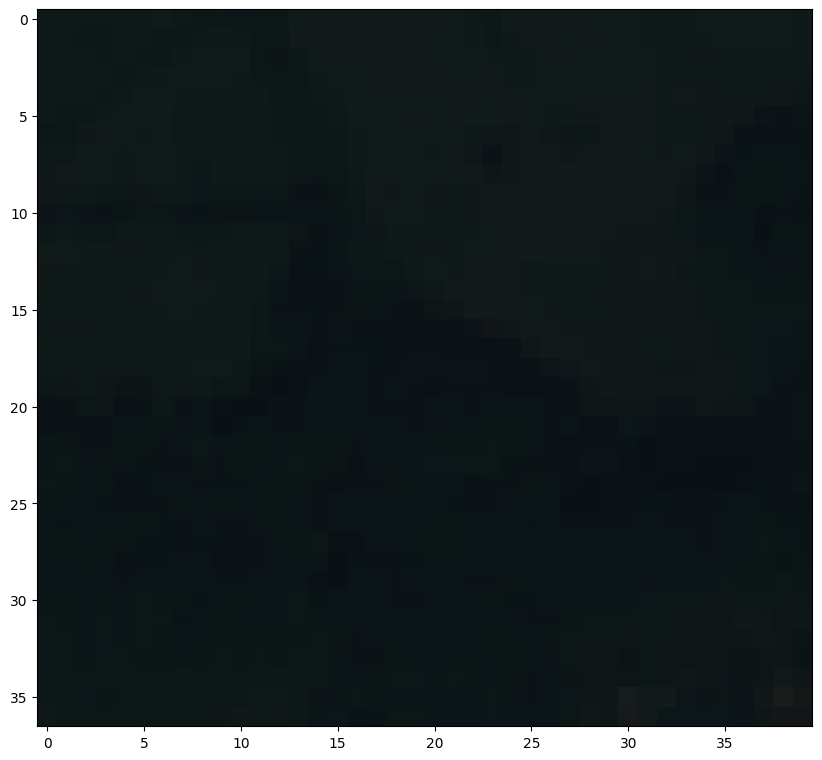

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# # plot irt with factor = 3.5/255
# ax.imshow(s2_l2a_mst*3.5/255)



# region = {

for i in range(len(date_list)):

    s2_reference_date = date_list[i]
    bbox = BBox(region.bounds, crs=CRS.WGS84)
    s2_l2a_mst = get_s2_l2a(bbox, s2_reference_date, config)

    # plt.show()


    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # plot irt with factor = 3.5/255
    ax.imshow(s2_l2a_mst)




    plt.show()


    # take the center 32x32 pixels
    size_x = s2_l2a_mst.shape[0]
    size_y = s2_l2a_mst.shape[1]
        
    image = s2_l2a_mst[int(size_x/2)-16:int(size_x/2)+16, int(size_y/2)-16:int(size_y/2)+16, :]
    #
    if i == 0:
        images = image
    else:
        images = np.concatenate((images, image), axis=0)

im_ts = Image.fromarray(images)
im_ts.save('download_example.png')


In [13]:
# from image1 to image8, add them on top of each other

image_ts = np.concatenate([image1, image2, image3, image4, image5, image6, image7, image8], axis=0)
plt.imshow(image_ts)
im_ts = Image.fromarray(image_ts)
im_ts.save('delft2_ts.png')

NameError: name 'image1' is not defined

In [45]:
from PIL import Image
im = Image.fromarray(image)
im.save('delft0.png')

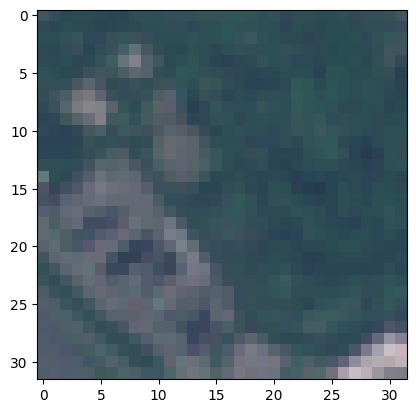

In [65]:
plt.imshow(image_enhanced)

In [67]:
# to unit 8
im_enhanced = Image.fromarray((image_enhanced*255).astype(np.uint8))
im_enhanced.save('delft0_enh.png')
